Non convergent, retrying...


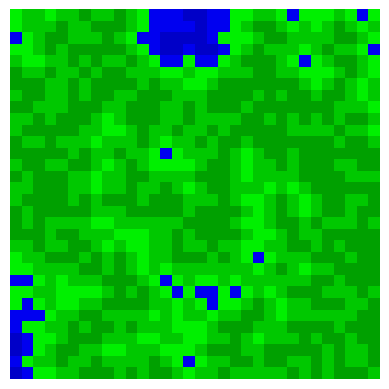

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random

SIZE = 32
COLOR_MAP = {-1: [0, 0, 0],
             0: [0, 160, 0],
             1: [0, 200, 0],
             2: [0, 240, 0],
             3: [0, 0, 240],
             4: [0, 0, 200]}
NUM_COLORS = len(COLOR_MAP) - 1



def compatible_colors(color):
    return {c for c in range(NUM_COLORS) if abs(c - color) <= 1}

def neighbors(i, j):
    """4-directional neighbors inside the grid."""
    for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        ni, nj = i + di, j + dj
        if 0 <= ni < SIZE and 0 <= nj < SIZE:
            yield ni, nj
            
def propagate(i, j):
    possible[i][j] = {grid[i, j]}
    color = grid[i, j]
    for ni, nj in list(neighbors(i, j)):
        if grid[ni, nj] != -1:
            continue
        sub_neighbors = neighbors(ni, nj)
        collapsed_colors = [grid[x, y] for x, y in sub_neighbors if grid[x, y] != -1]
        compatible = set.intersection(*(compatible_colors(c) for c in collapsed_colors)) if collapsed_colors else set(range(NUM_COLORS))
        possible[ni][nj] = compatible
        
def collapse_next_cell():
    min_entropy = float('inf')
    min_cell = None
    for i in range(SIZE):
        for j in range(SIZE):
            if grid[i, j] == -1:
                entropy = len(possible[i][j])
                if entropy < min_entropy:
                    min_entropy = entropy
                    min_cell = (i, j)
    if min_cell is None:
        return -1, -1
    
    i, j = min_cell
    chosen_color = random.choice(list(possible[i][j]))
    grid[i, j] = chosen_color
    return i, j

def convert_to_rgb(img):
    rgb_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rgb_img[i, j] = COLOR_MAP[img[i, j]]
            
    return rgb_img

def view_image(img):
    plt.imshow(convert_to_rgb(img))
    plt.axis('off')
    plt.show()
    

grid_snapshots = []
while True:
    try:
        grid = np.full((SIZE, SIZE), -1, dtype=int)
        possible = [[set(range(NUM_COLORS)) for _ in range(SIZE)] for _ in range(SIZE)]
            
        grid[SIZE // 2, SIZE // 2] = 1
        propagate(SIZE // 2, SIZE // 2)

        grid_snapshots = []
        for _ in range(SIZE * SIZE):
            i, j = collapse_next_cell()
            propagate(i, j)
            grid_snapshots.append(grid.copy())
        view_image(grid)
        break
    except Exception as e:
        print("Non convergent, retrying...")
        continue

In [8]:
import imageio

imageio.mimsave('wfc.gif', grid_snapshots, fps=10)

TypeError: Cannot handle this data type: (1, 1), <i8